# Linear SVM

We test the linear SVM class we implemented.

In [1]:
import matplotlib.pyplot as plt
%pylab inline

from sklearn.model_selection import train_test_split

import numpy as np

from SVM import SVM

from KernelSVM import KernelSVM

Populating the interactive namespace from numpy and matplotlib


In [1]:
#test KernelSVM() with offset vs old (without)

n_samples = 50

blob1 = np.random.multivariate_normal([10,0], 0.05*np.eye(2), n_samples)
blob2 = np.random.multivariate_normal([12,0], 0.05*np.eye(2), n_samples)
x_m = np.array([10,0]).reshape((1,2))
x_p = np.array([12,0]).reshape((1,2))
X = np.concatenate((blob1, x_m, x_p, blob2))
y = np.concatenate((-np.ones(n_samples+1), np.ones(n_samples+1)))


plt.scatter(X[:,0], X[:,1], c=y)
plt.title("2 Gaussian blobs")

# Train/test split, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0, random_state=42)


linear_kernel = lambda x, y: np.dot(x.T, y)

lambda_reg = 0.1
pd_kernel = linear_kernel
kernel_parameters={}

SVM_ = KernelSVM(lambda_reg,pd_kernel,kernel_parameters,threshold=-1, verbose=2)
SVM_.fit(X_train, y_train)
y_pred = SVM_.predict(X_train)
y_pred_old = SVM_.pred(X_train)

score = sum(y_pred==y_train)/len(y_train)
print(score)
score_old = sum(y_pred_old==y_train)/len(y_train)
print(score_old)

w_new = SVM_.get_w()
print(w_new)

NameError: name 'np' is not defined

In [20]:
b=-0.92380495
print(np.dot(w_new,x_m.flatten())+b)
print(SVM_.project(x_m))
print

-0.042386985573519165
[-0.04238698]


<function print>

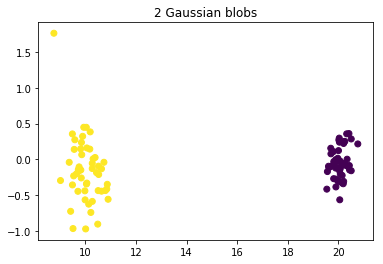

In [22]:
# Data generation
n_samples = 50

blob1 = np.random.multivariate_normal([10,0], 0.2*np.eye(2), n_samples)
blob2 = np.random.multivariate_normal([20,0], 0.07*np.eye(2), n_samples)

X = np.concatenate((blob1, blob2))
X = np.concatenate((X, np.ones((n_samples*2,1))), axis=1) # to account for offset
y = np.concatenate((np.ones(n_samples), -np.ones(n_samples)))

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("2 Gaussian blobs")

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=42)


linear_kernel = lambda x, y: np.dot(x.T, y)


In [3]:
# Train/test split, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=42)

In [4]:
classif = SVM(tau=0.01)

In [5]:
classif.fit(X_train, y_train)

In [6]:
w_opt = classif.get_weights()

Text(0.5,1,'SVM hyperplan vizualization')

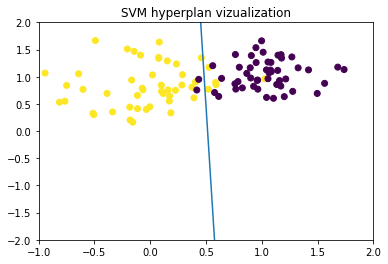

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

plt.plot(np.linspace(-5,5, 10), [-(w_opt[0]*x + w_opt[2])/w_opt[1] 
                                 for x in np.linspace(-5,5,10)])
plt.xlim(-1 ,2)
plt.ylim(-2, 2)
plt.title('SVM hyperplan vizualization')

In [8]:
X.shape

(100, 3)

# Kernel SVM

- Should we include an offset for the kernel SVM ?

In [8]:
from cvxopt import matrix
from cvxopt import solvers

SVM dual problem (slide 155) :

\begin{align}
\max_{\alpha \in \mathbb{R}^n} 2 \alpha^T y - \alpha^T K \alpha, \hspace{10pt} s.t. \hspace{10pt} 0 \leq y_i \alpha_i \leq \frac{1}{2\lambda n}
\end{align}

Equivalent to :

\begin{align}
\min_{\alpha \in \mathbb{R}^n} \alpha^T K \alpha - 2 \alpha^T y , \hspace{10pt} s.t. \hspace{10pt} 0 \leq y_i \alpha_i \leq \frac{1}{2\lambda n}
\end{align}

CVXOPT solves QP of the form :

\begin{align}
\min \frac{1}{2} x^T P x + q^T x \hspace{10pt} s.t. \hspace{10pt} Gx \leq h, Ax=b
\end{align}

SVM dual problem can be written as a generic QP with :
\begin{align}
P = 2K\\
q = -2y \\
G = \begin{pmatrix}diag(y)  \\ -diag(y) \end{pmatrix} \in \mathbb{R}^{2n \times n}\\
h = \frac{1}{2\lambda n} \begin{pmatrix} 1_n  \\ 0_n \end{pmatrix}
\end{align}


In [2]:
from kernel import build_kernel_matrix, build_kernel_vector

In [3]:
linear_kernel = lambda x, y: np.dot(x.T, y)

In [4]:
polynomial_kernel = lambda x,y : np.dot(x.T, y)**2

In [5]:
rbf_kernel = lambda x, y : np.exp(-5*np.linalg.norm(x-y, 2)**2)

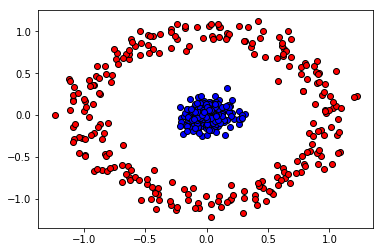

In [6]:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn-datasets-make-circles
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, shuffle=True, noise=0.1, random_state=None, factor=0.01)
#X += np.array((2000,4000))
y = 2*y - np.ones(500) # to have either y=1 or y=-1

reds = y==-1
blues = y==1
plt.scatter(X[reds, 0], X[reds,1], color='r', edgecolor='k')
plt.scatter(X[blues, 0], X[blues,1], color='blue', edgecolor='k')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=42)

In [8]:
X_train.shape
print(X_train[:,1].mean())
print(y_train.shape)

-0.010031501153770774
(400,)


In [9]:
pd_kernel = rbf_kernel
kernel_parameters = {}
lambda_reg = 0.1


In [17]:
SVM_ = KernelSVM(lambda_reg,pd_kernel,kernel_parameters,threshold=0.01, verbose=2)
SVM_.fit(X_train, y_train)
y_pred = SVM_.predict(X_test)
y_pred_nob = SVM_.predict_nob(X_test)
y_pred_old = SVM_.pred(X_test)

numbers of support vectors : 299
bias: [-0.86892255]


In [18]:
score = sum(y_pred==y_test)/len(y_test)
print(score)
score_nob = sum(y_pred_nob==y_test)/len(y_test)
print(score_nob)
score_old = sum(y_pred_old==y_test)/len(y_test)
print(score_old)

0.98
0.49
1.0


In [34]:
# linear kernel matrix
K = build_kernel_matrix(X_train, pd_kernel,kernel_parameters)

n = K.shape[0]
lambda_reg = 10 # regularization parameter

# D-SVM to generic QP
P = 2*K
q = -2*y_train
G = np.concatenate([np.diag(y_train), -np.diag(y_train)], axis=0)
h = np.concatenate([np.ones(n), np.zeros(n)])/(2*lambda_reg*n)

# Converts matrices and vectors to the right format for cvxopt solver
# cf http://cvxopt.org/userguide/coneprog.html for solver's doc
P_solver, q_solver = matrix(P), matrix(q)
G_solver, h_solver = matrix(G), matrix(h)

print(P.shape, q.shape, G.shape, h.shape)        
sol = solvers.qp(P=P_solver, q=q_solver, G=G_solver, h=h_solver)
alpha = np.array(sol['x'])

(400, 400) (400,) (800, 400) (800,)


In [28]:
y_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    y_pred[i] = np.sign(np.dot(alpha.T, build_kernel_vector(X_train, X_test[i,:], pd_kernel, kernel_parameters)))

In [29]:
print('Prediction score : {}'.format(sum(y_pred == y_test)/len(y_test)*100))

Prediction score : 100.0


In [222]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [223]:
sum(clf.predict(X_test)==y_test)

100

In [224]:
y_pred

array([ 1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.])